<a href="https://colab.research.google.com/github/elifulton/BW_1/blob/master/Eli_Fulton_DS19_BW_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd
import sqlite3 as lite
conn = lite.connect("/content/database.sqlite")

lastfm_df = pd.read_csv('/content/artists.csv')

lastfm_df_copy = lastfm_df
lastfm_df_copy = lastfm_df_copy.rename(columns={'artist_lastfm':'artist'})
lastfm_df_copy['artist'] = lastfm_df_copy['artist'].str.lower()
lastfm_df_copy = lastfm_df_copy.drop(['mbid', 'artist_mb', 'country_mb', 'tags_mb', 'tags_lastfm', 'ambiguous_artist'], axis=1)

lastfm_df_copy.head(25)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (2,4,6) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,artist,country_lastfm,listeners_lastfm,scrobbles_lastfm
0,coldplay,United Kingdom,5381567.0,360111850.0
1,radiohead,United Kingdom,4732528.0,499548797.0
2,red hot chili peppers,United States,4620835.0,293784041.0
3,rihanna,Barbados; United States,4558193.0,199248986.0
4,eminem,United States,4517997.0,199507511.0
5,the killers,NaN,4428868.0,208722092.0
6,kanye west,United States,4390502.0,238603850.0
7,nirvana,United States,4272894.0,222303859.0
8,muse,United Kingdom,4089612.0,344838631.0
9,queen,United Kingdom,4023379.0,191711573.0


In [9]:
pf_df_1 = pd.read_sql_query('SELECT * FROM reviews', conn)
pf_df_2 = pd.read_sql_query('SELECT * FROM years', conn)

pf_df_1_copy = pf_df_1
pf_df_2_copy = pf_df_2

pf_df_1.head()

,reviewid,title,artist,url,score,best_new_music,author,author_type,pub_date,pub_weekday,pub_day,pub_month,pub_year
0,22703,mezzanine,massive attack,http://pitchfork.com/reviews/albums/22703-mezz...,9.3,0,nate patrin,contributor,2017-01-08,6,8,1,2017
1,22721,prelapsarian,krallice,http://pitchfork.com/reviews/albums/22721-prel...,7.9,0,zoe camp,contributor,2017-01-07,5,7,1,2017
2,22659,all of them naturals,uranium club,http://pitchfork.com/reviews/albums/22659-all-...,7.3,0,david glickman,contributor,2017-01-07,5,7,1,2017
3,22661,first songs,"kleenex, liliput",http://pitchfork.com/reviews/albums/22661-firs...,9.0,1,jenn pelly,associate reviews editor,2017-01-06,4,6,1,2017
4,22725,new start,taso,http://pitchfork.com/reviews/albums/22725-new-...,8.1,0,kevin lozano,tracks coordinator,2017-01-06,4,6,1,2017


In [10]:
final_df_1 = pd.merge(pf_df_1_copy, lastfm_df_copy, on='artist', how='inner')

final_df_2 = pd.merge(pf_df_2_copy, final_df_1, on='reviewid', how='inner')

final_df_2.head()

,reviewid,year,title,artist,url,score,best_new_music,author,author_type,pub_date,pub_weekday,pub_day,pub_month,pub_year,country_lastfm,listeners_lastfm,scrobbles_lastfm
0,22703,1998.0,mezzanine,massive attack,http://pitchfork.com/reviews/albums/22703-mezz...,9.3,0,nate patrin,contributor,2017-01-08,6,8,1,2017,United Kingdom,2577949.0,117454784.0
1,22721,2016.0,prelapsarian,krallice,http://pitchfork.com/reviews/albums/22721-prel...,7.9,0,zoe camp,contributor,2017-01-07,5,7,1,2017,United States,32307.0,964540.0
2,22725,2016.0,new start,taso,http://pitchfork.com/reviews/albums/22725-new-...,8.1,0,kevin lozano,tracks coordinator,2017-01-06,4,6,1,2017,Japan; United States,10412.0,62640.0
3,22704,2016.0,stillness in wonderland,little simz,http://pitchfork.com/reviews/albums/22704-litt...,7.1,0,katherine st. asaph,contributor,2017-01-05,3,5,1,2017,United Kingdom,85942.0,1290436.0
4,22694,2016.0,tehillim,yotam avni,http://pitchfork.com/reviews/albums/22694-tehi...,7.0,0,andy beta,contributor,2017-01-05,3,5,1,2017,NaN,6573.0,35268.0


In [12]:
final_df_2.head()

,reviewid,year,title,artist,url,score,best_new_music,author,author_type,pub_date,pub_weekday,pub_day,pub_month,pub_year,country_lastfm,listeners_lastfm,scrobbles_lastfm
0,22703,1998.0,mezzanine,massive attack,http://pitchfork.com/reviews/albums/22703-mezz...,9.3,0,nate patrin,contributor,2017-01-08,6,8,1,2017,United Kingdom,2577949.0,117454784.0
1,22721,2016.0,prelapsarian,krallice,http://pitchfork.com/reviews/albums/22721-prel...,7.9,0,zoe camp,contributor,2017-01-07,5,7,1,2017,United States,32307.0,964540.0
2,22725,2016.0,new start,taso,http://pitchfork.com/reviews/albums/22725-new-...,8.1,0,kevin lozano,tracks coordinator,2017-01-06,4,6,1,2017,Japan; United States,10412.0,62640.0
3,22704,2016.0,stillness in wonderland,little simz,http://pitchfork.com/reviews/albums/22704-litt...,7.1,0,katherine st. asaph,contributor,2017-01-05,3,5,1,2017,United Kingdom,85942.0,1290436.0
4,22694,2016.0,tehillim,yotam avni,http://pitchfork.com/reviews/albums/22694-tehi...,7.0,0,andy beta,contributor,2017-01-05,3,5,1,2017,NaN,6573.0,35268.0


In [13]:
final_df_2.tail()

,reviewid,year,title,artist,url,score,best_new_music,author,author_type,pub_date,pub_weekday,pub_day,pub_month,pub_year,country_lastfm,listeners_lastfm,scrobbles_lastfm
18969,1535,NaN,let us replay!,coldcut,http://pitchfork.com/reviews/albums/1535-let-u...,8.9,0,james p. wisdom,None,1999-01-26,1,26,1,1999,United Kingdom,448493.0,4457928.0
18970,1341,NaN,1999,cassius,http://pitchfork.com/reviews/albums/1341-1999/,4.8,0,james p. wisdom,None,1999-01-26,1,26,1,1999,France,582046.0,5800546.0
18971,5376,NaN,out of tune,mojave 3,http://pitchfork.com/reviews/albums/5376-out-o...,6.3,0,jason josephes,contributor,1999-01-12,1,12,1,1999,United Kingdom,131576.0,2938878.0
18972,2413,1999.0,"singles breaking up, vol. 1",don caballero,http://pitchfork.com/reviews/albums/2413-singl...,7.2,0,james p. wisdom,None,1999-01-12,1,12,1,1999,United States,173451.0,3771315.0
18973,3723,NaN,left for dead in malaysia,neil hamburger,http://pitchfork.com/reviews/albums/3723-left-...,6.5,0,jason josephes,contributor,1999-01-05,1,5,1,1999,Australia; United States,13175.0,189054.0


In [14]:
final_df_2.shape

(18974, 17)

In [16]:
final_df_2 = final_df_2.dropna(subset=['year'])

In [17]:
final_df_2['year_gap'] = final_df_2['pub_year'] - final_df_2['year']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


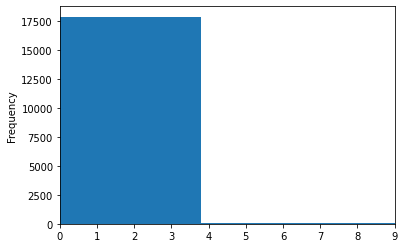

In [18]:
final_df_2['year_gap'].plot.hist(bins=10, xlim=(0, 9))

In [35]:
final_df_2.dtypes

reviewid              int64
year                float64
title                object
artist               object
url                  object
score               float64
best_new_music        int64
author               object
author_type          object
pub_date             object
pub_weekday           int64
pub_day               int64
pub_month             int64
pub_year              int64
country_lastfm       object
listeners_lastfm    float64
scrobbles_lastfm    float64
year_gap            float64
dtype: object

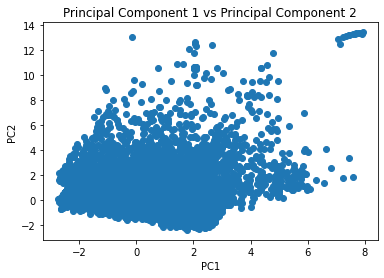

In [37]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

scaler = StandardScaler()

Z = scaler.fit_transform(final_df_2.select_dtypes(include=["int64", "float64"]).values)

pca = PCA(2)

transformed_data = pca.fit_transform(Z)

plt.scatter(transformed_data[:,0], transformed_data[:,1])
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Principal Component 1 vs Principal Component 2")
plt.show()

In [66]:
final_df_2[final_df_2['year'] == 2013].corr()

,reviewid,year,score,best_new_music,pub_weekday,pub_day,pub_month,pub_year,listeners_lastfm,scrobbles_lastfm,year_gap
reviewid,1.000000,NaN,-0.024957,0.008641,-0.025198,-0.026870,0.769156,0.379625,-0.003437,0.022196,0.379625
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
score,-0.024957,NaN,1.000000,0.475767,-0.006930,0.012288,-0.018079,-0.010747,-0.002473,0.030786,-0.010747
best_new_music,0.008641,NaN,0.475767,1.000000,-0.046950,-0.041847,0.007197,0.009020,0.182869,0.161966,0.009020
pub_weekday,-0.025198,NaN,-0.006930,-0.046950,1.000000,0.034851,-0.036025,0.004236,-0.103757,-0.083178,0.004236
pub_day,-0.026870,NaN,0.012288,-0.041847,0.034851,1.000000,-0.057894,-0.080527,-0.008027,-0.007856,-0.080527
pub_month,0.769156,NaN,-0.018079,0.007197,-0.036025,-0.057894,1.000000,-0.272299,-0.003327,0.035009,-0.272299
pub_year,0.379625,NaN,-0.010747,0.009020,0.004236,-0.080527,-0.272299,1.000000,-0.001239,-0.019926,1.000000
listeners_lastfm,-0.003437,NaN,-0.002473,0.182869,-0.103757,-0.008027,-0.003327,-0.001239,1.000000,0.887053,-0.001239
scrobbles_lastfm,0.022196,NaN,0.030786,0.161966,-0.083178,-0.007856,0.035009,-0.019926,0.887053,1.000000,-0.019926


(-1.0, 1.0)

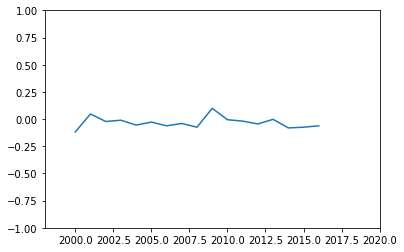

In [64]:
x = range(2000, 2017)
y = [final_df_2[final_df_2['year'] == i].corr()['listeners_lastfm'][2] for i in x]
plt.plot(x, y)
plt.xlim(1998, 2020)
plt.ylim(-1, 1)

(-1.0, 1.0)

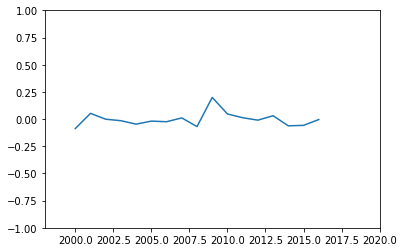

In [67]:
x = range(2000, 2017)
y = [final_df_2[final_df_2['year'] == i].corr()['scrobbles_lastfm'][2] for i in x]
plt.plot(x, y)
plt.xlim(1998, 2020)
plt.ylim(-1, 1)

(-1.0, 1.0)

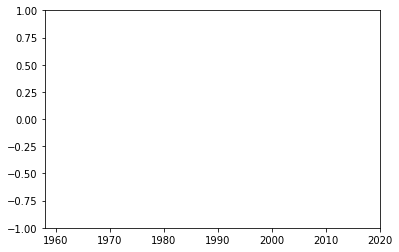

In [70]:
x = range(1958, 2017)
y = [final_df_2[final_df_2['year'] == i].corr()['score'][1] for i in x]
plt.plot(x, y)
plt.xlim(1958, 2020)
plt.ylim(-1, 1)